# Project 3: Classifying Movies

Welcome to the last project of Data Science for All! You will build a classifier that labels a movie as romance or action, using the words that appear in the movies's screenplay. By the end of the project, you should know how to:

* Build a k-nearest-neighbors classifier.
* Test a classifier on data.

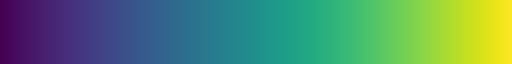

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Move the import statement here

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import libraries for regression
import statsmodels.formula.api as smf

# Set style for seaborn plots
sns.set_style('dark')
sns.color_palette("viridis", as_cmap=True)

In [2]:
movies = pd.read_csv('movies.csv')
stem = pd.read_csv('stem.csv')
movies.head().iloc[:, :]

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## kNN classfication model

k-NN

finding the distance between a new point (Alice) and each point in the training sample

sorting the data table by these distances

selecting the top k rows

The features we will use are the proportions of the words "i" and "the" in the movie.

In [3]:
# 1. Finding the distance between any 2 points
def dist_point_point(point1, point2):
    """Compute the distance between point 1 and point 2 where each argument is an array consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

# 2. Finding the distance between any point and every other point in the table
def dist_point_row(point1, training_set):
    """Compute the distance between point 1 and every other point in a data set"""
    genre_excluded = training_set.drop(columns = {'Title', 'Genre'}).copy()
    distance_column = genre_excluded.apply(lambda row: dist_point_point(point1, row), axis=1)
    training_set_with_dist = training_set.copy()
    training_set_with_dist['distance'] = distance_column  
    return training_set_with_dist

# 3. Identify k nearest neighbours and determine the majority class
def knn_genre(point1, training_set, k):
    """Identify k nearest neighbours (by sorting rows descendingly and pick the top k rows)"""
    training_set_with_dist = dist_point_row(point1, training_set)
    training_set_with_dist[['Genre', 'Title']] = training_set[['Genre', 'Title']]
    k_neighbours = training_set_with_dist.nsmallest(k, 'distance')
    return k_neighbours

# 5. Determine the majority genre of k nearest neighbours
def knn_classification(point1, training_set, k):
    """Classify the genre of a new data point using k-nearest neighbour method"""
    k_neighbours = knn_genre(point1, training_set, k)
    majority_genre = k_neighbours['Genre'].mode()
    return majority_genre

For 2 attributes (i.e. any 2 words like 'i' or 'the' or 'pub').

SUPER IMPORTANT! THE REASON LAST TIME IT WORKS FOR CLASS BUT NOW NOT FOR GENRE IS BC GENRE ARE STRINGS! YOU CANT DO MATHS ON ROWS WITH STRINGS! BUT IF YOU REMOVE GENRE THEN IT DOESTN WORK FOR SOME REASON...

In [4]:
attribute_columns = input("Enter the attribute columns separated by spaces (e.g. bikini love): ").split(' ')
relevant_attributes = movies[['Title', 'Genre'] + attribute_columns]
train_set, test_set = train_test_split(relevant_attributes, test_size=0.2, random_state=404)
display(train_set.head(8))
test_set.head()

,Title,Genre,i,love
98,manhunt,action,0.038001,0.000826
95,terminator 2: judgment day,action,0.037313,0.001866
223,crime spree,action,0.033397,0.000190
41,wild at heart,romance,0.038149,0.001923
38,bull durham,romance,0.041575,0.003404
77,jerry maguire,romance,0.050979,0.006600
86,my girl,romance,0.041443,0.002577
39,conspiracy theory,romance,0.037661,0.005317


,Title,Genre,i,love
179,grosse pointe blank,romance,0.038484,0.002960
116,innerspace,action,0.037072,0.002081
64,my best friend's wedding,romance,0.035067,0.004837
172,minority report,action,0.035454,0.001217
161,saving private ryan,action,0.030990,0.000189


In [5]:
new_data = input('Enter the name of the movie in the test set you would like to predict:')
new_data_row = test_set[test_set['Title'] == new_data.lower()]

k = int(input("Enter k: "))
if isinstance(k, int) and k > 0:
    predicted_genre = knn_classification(new_data_row.iloc[0], train_set, k).reset_index()
    print(f'The predicted genre for the movie "{new_data.title()}"'
          f' is: {predicted_genre.loc[0, "Genre"].upper()}.')
else:
    print("Invalid input. Please enter a valid integer for k.")

The predicted genre for the movie "Batman" is: ROMANCE.


In [9]:
new_data = input('Enter the name of the movie in the test set you would like to predict:')
new_data_row = train_set[train_set['Title'] == new_data.lower()]

k = int(input("Enter k: "))
if isinstance(k, int) and k > 0:
    predicted_genre = knn_classification(new_data_row.iloc[0], train_set, k).reset_index()
    print(f'The predicted genre for the movie "{new_data.title()}"'
          f' is: {predicted_genre.loc[0, "Genre"].upper()}.')
else:
    print("Invalid input. Please enter a valid integer for k.")

The predicted genre for the movie "My Girl" is: ROMANCE.


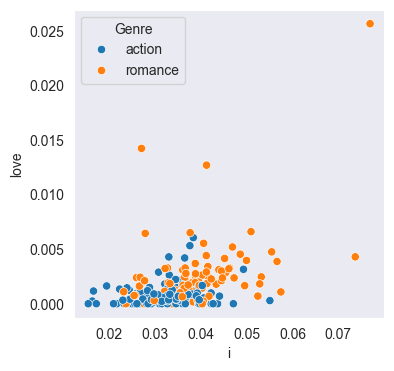

In [10]:
plt.figure(figsize = (4, 4))
sns.scatterplot(
    data = train_set,
    x = attribute_columns[0],
    y = attribute_columns[1],
    hue = 'Genre'
)

plt.show()

In [11]:
# Evaluation for train set: expects 100%
evaluation = train_set.copy()
evaluation['Predicted genre'] = train_set.apply(lambda row: knn_classification(row, train_set, k), axis=1).copy()
accuracy = (evaluation['Predicted genre'] == evaluation['Genre']).value_counts(normalize = True)[True]
print(f"Accuracy: {accuracy*100:.1f}%")

ValueError: Cannot set a DataFrame with multiple columns to the single column Predicted genre

fling, i, 1 = 98.4% train set = 44.1s

bikini, love, 1 = 95.9% train set = 38.8s

In [ ]:
# Evaluation for train set: expects 100%
evaluation = test_set.copy()
evaluation['Predicted genre'] = test_set.apply(lambda row: knn_classification(row, train_set, k), axis=1).copy()
accuracy = (evaluation['Predicted genre'] == evaluation['Genre']).value_counts(normalize = True)[True]
print(f"Accuracy: {accuracy*100:.1f}%")

fling, i, 1 = 59.2% train set = 8.7s

bikini, love, 1 = 61.2% test set = 9.9s

In [ ]:
# Take in knn arguments -> return an accuracy score
k_values = [1, 3, 5]
def evaluate(row, train_set, k):
    accuracy_table = train_set.copy()
    for i in range(1, 6):
        evaluation = train_set.copy()
        evaluation['Predicted genre'] = train_set.apply(lambda row: knn_classification(row, train_set, k_values), axis=1).copy()
        accuracy = (evaluation['Predicted genre'] == evaluation['Genre']).value_counts(normalize = True)[True]
        accuracy_table.append({
            'k': k_values,
            'accuracy': accuracy
    })
    return accuracy

In [ ]:
evaluation = test_set.copy()
evaluation['Predicted genre'] = test_set.apply(lambda row: knn_classification(row, train_set, k), axis=1).copy()
accuracy = (evaluation['Predicted genre'] == evaluation['Genre']).value_counts(normalize = True)[True]
print(f"Accuracy: {accuracy*100:.1f}%")

In [ ]:

train2 = train_set[['Title', 'Genre']]
train2 = train_set.copy()
train2


If k = 1 then for the training set accuracy should be 100% unless theer r identical points.

In [ ]:
k = int(input("Enter k: "))
train2['Predicted genre'] = train2.apply(lambda row: knn_classification(row, train_set, k), axis=1)
accuracy = (train2['Predicted genre'] == train2['Genre']).value_counts(normalize = True)[True]
print(f"Accuracy: {accuracy*100:.1f}%")

how come it decreases as n for training set increaes??

In [ ]:
import matplotlib.pyplot as plt

# Assuming train2 is your DataFrame
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracies = []

for k in k_values:
    train2['Predicted genre'] = train2.apply(lambda row: knn_classification(row, train_set, k), axis=1)
    accuracy = (train2['Predicted genre'] == train2['Genre']).mean() * 100
    accuracies.append(accuracy)

# Plotting the histogram
plt.bar(k_values, accuracies, color='seagreen')
plt.xlabel('k values')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different k Values in k-NN')
plt.show()

In [ ]:
train2

In [ ]:
k = int(input("Enter k: "))
evaluation_table['Predicted genre'] = evaluation_table.apply(lambda row: knn_classification(row, train_set.head(100), k), axis=1)
accuracy = (evaluation_table['Predicted genre'] == evaluation_table['Genre']).value_counts()[True]
print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
mistakes = evaluation_table[evaluation_table['Predicted genre'] != evaluation_table['Genre']]
mistakes

In [ ]:
accuracy = (evaluation_table['Predicted genre'] == evaluation_table['Genre']).value_counts(normalize=True)[True]
print(f"The k-NN model based on the chosen attributes is {accuracy * 100:.2f}% accurate.")

For all 5000 words:

In [ ]:
relevant_attributes = movies.drop(columns = ['Year', 'Rating', '# Votes', '# Words']).copy()
train_set, test_set = train_test_split(relevant_attributes, test_size=0.2, random_state=404)
train_set = relevant_attributes.drop(columns = ['Title'])
train_set

In [ ]:
# Input the value of k
k = int(input("Enter k:"))

# Input the name of the movie
predicted_genre = knn_classification(test_set.loc[0], train_set)
print(f'The predicted genre is: {predicted_genre.upper()}.')

## Evaluating the accuracy of the k-NN model

Essentially we'll be determine the 'predicted genre' of each row of the test set using the model (for all 5000 words), then compute the proportion of predictions that are correct.

In [ ]:
test_set


In [ ]:
evaluation_table = test_set[['Title', 'Genre']]
evaluation_table['predicted genre'] = evaluation_table.apply(lambda row: knn_classification(row, train_set), axis = 1)
evaluation_table

In [ ]:
romance_subset_train = train_set[train_set['Genre'] == 'romance']
romance_subset_test = test_set[test_set['Genre'] == 'romance']
prop_romance_train = len(romance_subset_train) / len(train_set) * 100
prop_romance_test = len(romance_subset_test) / len(test_set) * 100

# sns.histplot(
#     data = romance_subset_train,
#     x = romance_subset_train['Genre'],
#     y = prop_romance_train
# )

# sns.histplot(
#     data = romance_subset_test,
#     x = romance_subset_test['Genre'],
#     y = prop_romance_test
# )

plt.figure(figsize=(3, 3))
plt.ylabel('Percentage of romance movies')
plt.title('Percentage of romance in Split Dataset')

sns.barplot(y = [prop_romance_train, prop_romance_test],
            x = ['Training Set', 'Test Set'],
            hue = ['Training Set', 'Test Set'],
            palette = 'mako')
plt.show()

In [ ]:
Best k? histplot
accuracy for all test set
    best: enter k, movie name and thats it